In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the datasets
sales_data = pd.read_excel('C:\\Users\\HP\\Desktop\\capstone\\Pizza_Sale.xlsx')
ingredients_data = pd.read_excel('C:\\Users\\HP\\Desktop\\capstone\\Pizza_ingredients.xlsx')

In [3]:
sales_data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
#data cleaning
sales_data.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [5]:
sales_data.dropna(inplace=True)

In [6]:
#remove duplicates
sales_data.drop_duplicates(inplace=True)

In [17]:
sales_data['pizza_category'].fillna(sales_data['pizza_category'].mode()[0], inplace=True)
sales_data['pizza_name_id'].fillna(sales_data['pizza_name_id'].mode()[0], inplace=True)

sales_data['pizza_ingredients'].fillna(sales_data['pizza_ingredients'].mode()[0], inplace=True)
sales_data['pizza_name'].fillna(sales_data['pizza_name'].mode()[0], inplace=True)

In [18]:
# Alternatively, filling based on similar pizzas (e.g., grouped by size or category)
# Filling `total_price` based on the average price of pizzas with the same size
sales_data['total_price'] =sales_data.groupby('pizza_size')['total_price'].transform(
    lambda x: x.fillna(x.mean())
)

In [7]:
sales_data['order_date']=pd.to_datetime(sales_data['order_date'],errors='coerce')

In [38]:

def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')
     

sales_data['order_date'] = sales_data['order_date'].apply(parse_dates)
     

sales_data['order_date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: order_date, dtype: datetime64[ns]

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48554 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48554 non-null  int64         
 1   order_id           48554 non-null  int64         
 2   pizza_name_id      48554 non-null  object        
 3   quantity           48554 non-null  int64         
 4   order_date         48554 non-null  datetime64[ns]
 5   order_time         48554 non-null  object        
 6   unit_price         48554 non-null  float64       
 7   total_price        48554 non-null  float64       
 8   pizza_size         48554 non-null  object        
 9   pizza_category     48554 non-null  object        
 10  pizza_ingredients  48554 non-null  object        
 11  pizza_name         48554 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


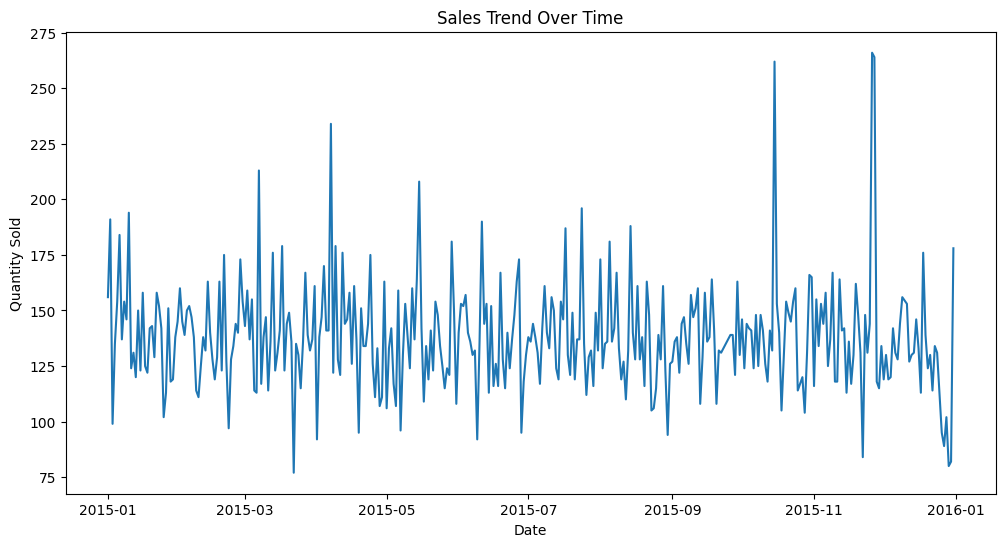

In [8]:
# Plot sales trends over time


# Group by order date and sum the quantity
quantity_over_time = sales_data.groupby('order_date')['quantity'].sum()
plt.figure(figsize=(12, 6))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

<Axes: title={'center': 'Monthly sales trends'}, xlabel='order_date'>

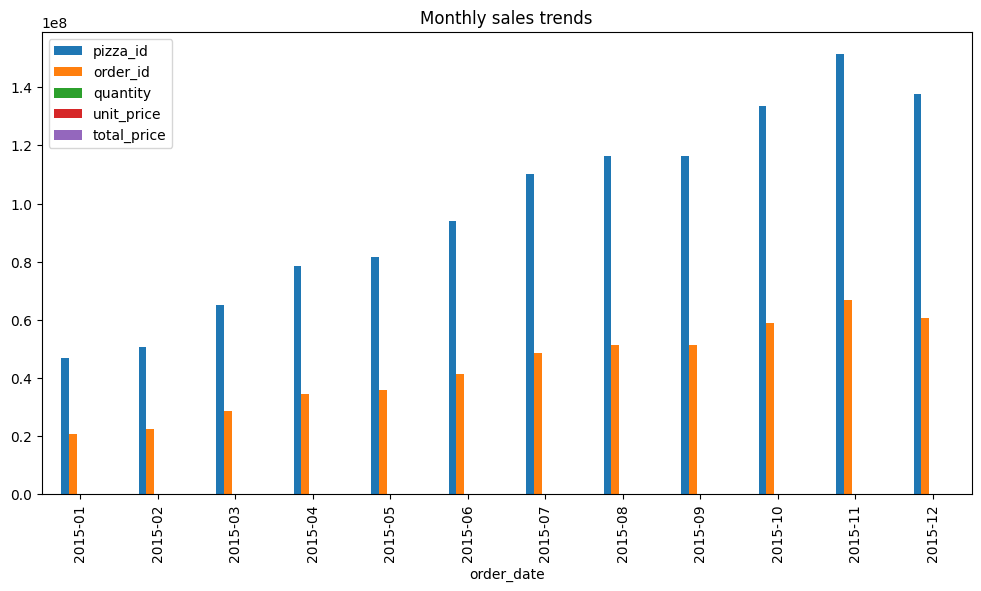

In [9]:
monthly_sales=sales_data.groupby(sales_data['order_date'].dt.to_period('M')).sum(numeric_only=True)
monthly_sales.plot(kind='bar',figsize=(12,6),title="Monthly sales trends")

In [39]:
#feature Engineering
sales_data['dayofweek']=sales_data['order_date'].dt.day_name()
sales_data['Isweekend']=sales_data['dayofweek'].isin(['saturday','sunday']).astype(int)
sales_data['month']=sales_data['order_date'].dt.month

In [22]:
# Extracting the day of the week
sales_data['day_of_week'] =sales_data['order_date'].dt.dayofweek # day_name()
# Extracting the month
sales_data['month'] = sales_data['order_date'].dt.month # month_name()
# Createing a new column for the week number
sales_data['week'] = sales_data['order_date'].dt.isocalendar().week
# Extracting the year
sales_data['year'] = sales_data['order_date'].dt.year

In [23]:
import holidays

# using US holidays
us_holidays = holidays.US()

# Creating a 'holiday' column that indicates if the order_date was a holiday
sales_data['holiday'] = sales_data['order_date'].apply(lambda x: 1 if x in us_holidays else 0)

# Checking if the holiday flag works
sales_data[['order_date', 'holiday']].head()

,order_date,holiday
0,2015-01-01,1
1,2015-01-01,1
2,2015-01-01,1
3,2015-01-01,1
4,2015-01-01,1


In [24]:
# Creating a 'promotional_period' flag for weekends 
sales_data['promotion'] = sales_data['order_date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Checking if the promotion flag works
sales_data[['order_date', 'promotion']].head()

,order_date,promotion
0,2015-01-01,0
1,2015-01-01,0
2,2015-01-01,0
3,2015-01-01,0
4,2015-01-01,0


In [12]:

# Step 1: Filter the pizza_sales dataset for any week(week 7):
week_7_sales = sales_data[sales_data['week'] == 7]

# Step 2: Group by pizza name and sum the quantities
grouped_sales = week_7_sales.groupby('pizza_name')['quantity'].sum().reset_index()

# Step 3: List all grouped pizza names and their total quantities
print(f"Pizzas sold in week 7:")
for _, row in grouped_sales.iterrows():
    print(f"{row['pizza_name']}: {row['quantity']} pizzas")

# Step 4: Calculate and print the total quantity sold in week 7
total_quantity_sold = week_7_sales['quantity'].sum()
print(f"\nTotal units of pizza sold in week 7: {total_quantity_sold} pizzas")

Pizzas sold in week 7:
The Barbecue Chicken Pizza: 65 pizzas
The Big Meat Pizza: 32 pizzas
The Brie Carre Pizza: 8 pizzas
The Calabrese Pizza: 22 pizzas
The California Chicken Pizza: 47 pizzas
The Chicken Alfredo Pizza: 27 pizzas
The Chicken Pesto Pizza: 16 pizzas
The Classic Deluxe Pizza: 44 pizzas
The Five Cheese Pizza: 29 pizzas
The Four Cheese Pizza: 37 pizzas
The Greek Pizza: 31 pizzas
The Green Garden Pizza: 19 pizzas
The Hawaiian Pizza: 35 pizzas
The Italian Capocollo Pizza: 33 pizzas
The Italian Supreme Pizza: 37 pizzas
The Italian Vegetables Pizza: 16 pizzas
The Mediterranean Pizza: 15 pizzas
The Mexicana Pizza: 35 pizzas
The Napolitana Pizza: 17 pizzas
The Pepper Salami Pizza: 16 pizzas
The Pepperoni Pizza: 49 pizzas
The Pepperoni, Mushroom, and Peppers Pizza: 22 pizzas
The Prosciutto and Arugula Pizza: 31 pizzas
The Sicilian Pizza: 44 pizzas
The Soppressata Pizza: 17 pizzas
The Southwest Chicken Pizza: 34 pizzas
The Spicy Italian Pizza: 34 pizzas
The Spinach Pesto Pizza: 14 

In [13]:
sales_data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,week,year,holiday,promotion
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3,1,1,2015,1,0
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3,1,1,2015,1,0
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3,1,1,2015,1,0
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3,1,1,2015,1,0
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,1,1,2015,1,0


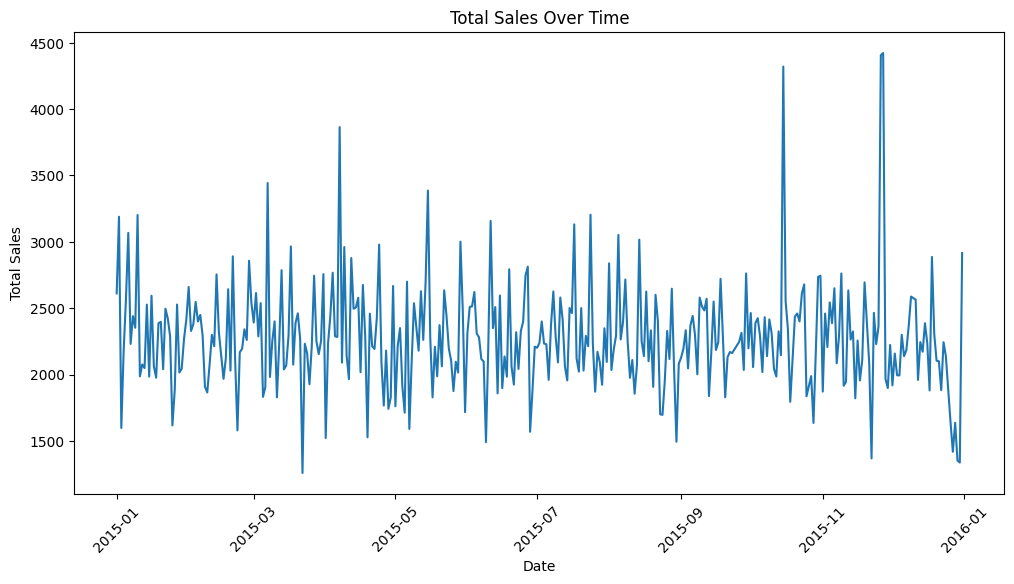

In [14]:
# Ploting sales over time
sales_over_time = sales_data.groupby('order_date')['total_price'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=sales_over_time, x='order_date', y='total_price')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

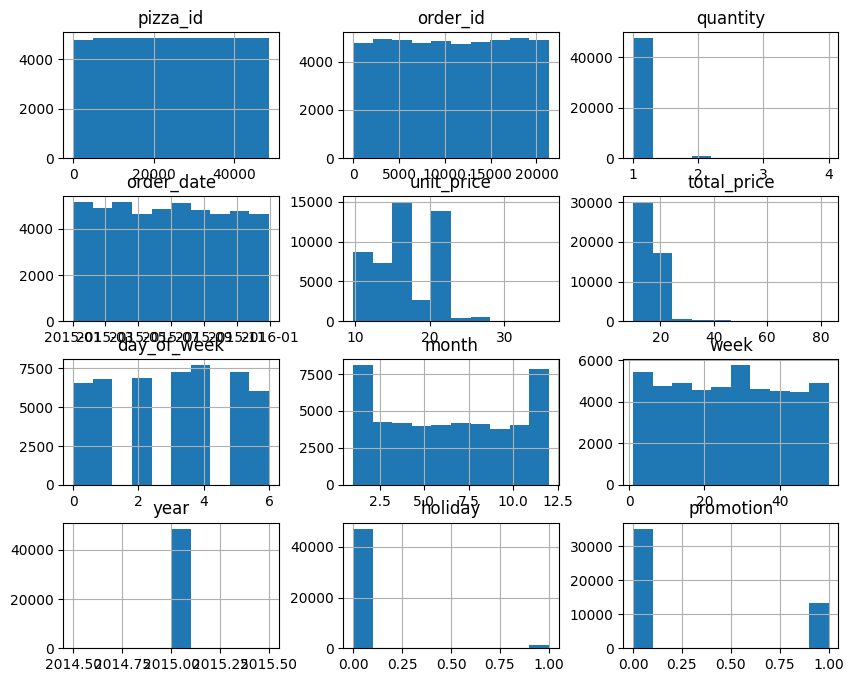

In [15]:
sales_data.hist(figsize=(10,8))
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_37952\1370827422.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pizza_sales.head(10), x='quantity', y='pizza_name', palette='viridis')


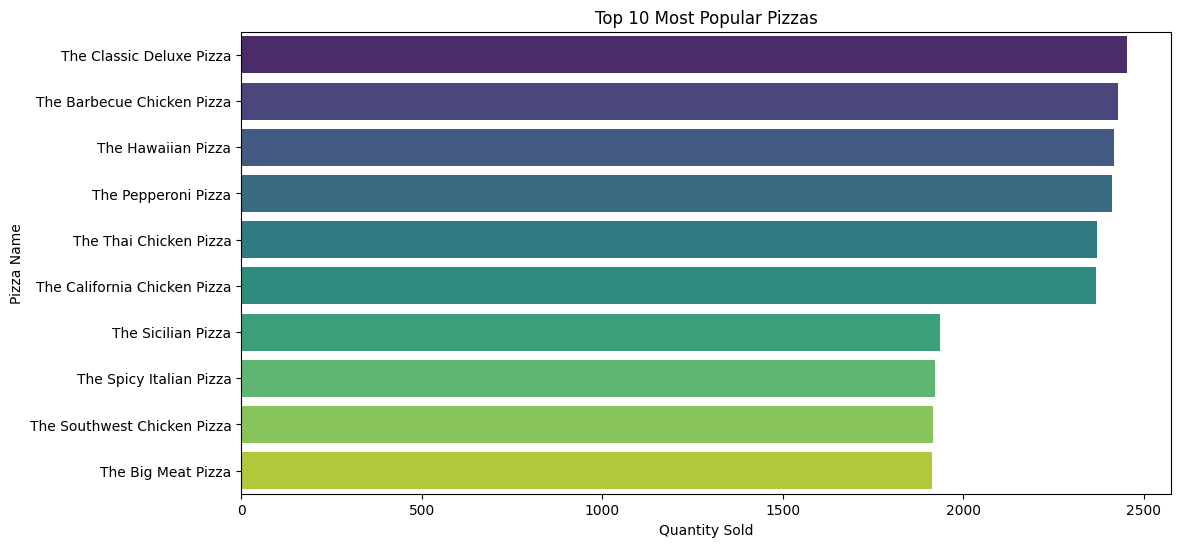

In [16]:
#top selling pizzas
# Aggregate sales by pizza name
pizza_sales = sales_data.groupby('pizza_name')['quantity'].sum().reset_index()

# Sorting by quantity sold
pizza_sales = pizza_sales.sort_values(by='quantity', ascending=False)

# Ploting top 10 most popular pizzas
plt.figure(figsize=(12,6))
sns.barplot(data=pizza_sales.head(10), x='quantity', y='pizza_name', palette='viridis')
plt.title('Top 10 Most Popular Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_37952\2571066537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=size_sales, x='pizza_size', y='quantity', palette='coolwarm')


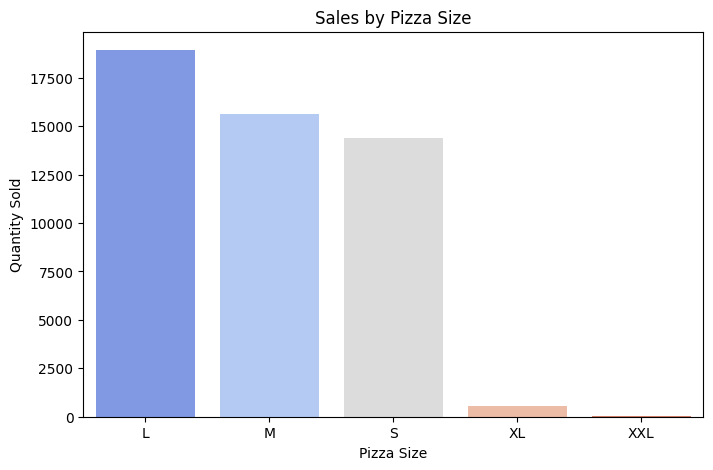

In [17]:
#sales by pizza size and catogery
# Ploting pizza size distribution
size_sales = sales_data.groupby('pizza_size')['quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=size_sales, x='pizza_size', y='quantity', palette='coolwarm')
plt.title('Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Quantity Sold')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_37952\4004889232.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='pizza_category', y='quantity', palette='coolwarm')


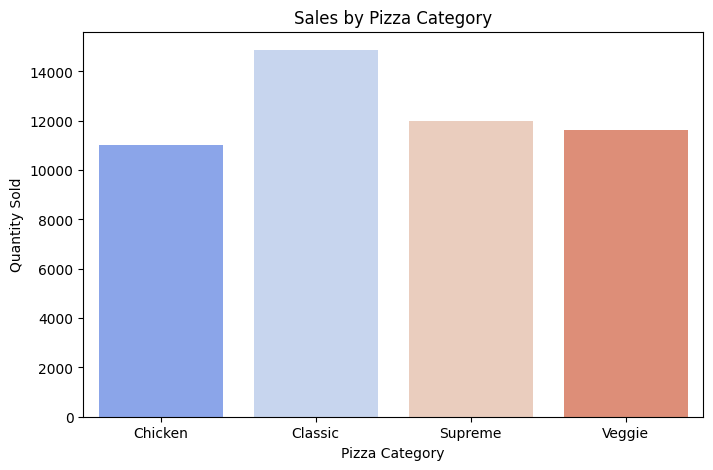

In [18]:
# Ploting pizza category distribution
category_sales = sales_data.groupby('pizza_category')['quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='pizza_category', y='quantity', palette='coolwarm')
plt.title('Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Quantity Sold')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_37952\3738438032.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='total_price', palette='viridis')


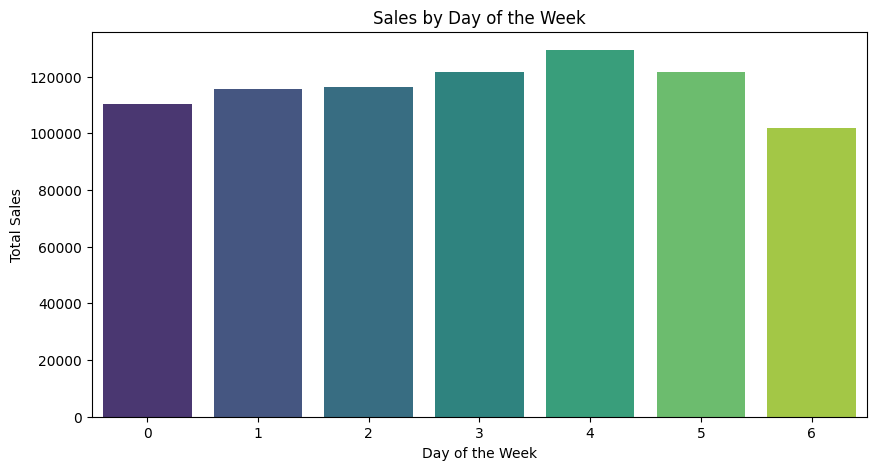

In [19]:
#Seasonal Sales Trends and Patterns
# Aggregate sales by day of the week
sales_by_day = sales_data.groupby('day_of_week')['total_price'].sum().reset_index()

# Order days of the week
#days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_order = [0, 1, 2, 3, 4, 5, 6]
sales_by_day['day_of_week'] = pd.Categorical(sales_by_day['day_of_week'], categories=days_order, ordered=True)

# Plot sales by day of the week
plt.figure(figsize=(10,5))
sns.barplot(data=sales_by_day, x='day_of_week', y='total_price', palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_47716\293607930.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_month, x='month', y='total_price', palette='magma')


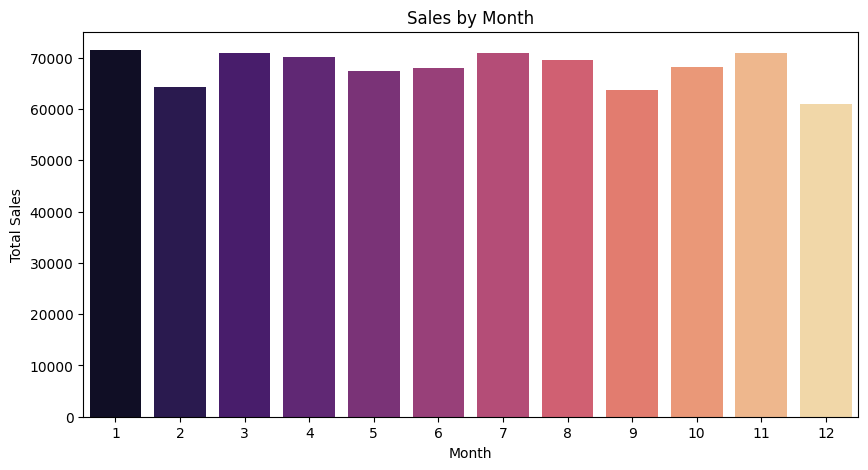

In [17]:
#sales by month
# Aggregate sales by month
sales_by_month = sales_data.groupby('month')['total_price'].sum().reset_index()

# Plot sales by month
plt.figure(figsize=(10,5))
sns.barplot(data=sales_by_month, x='month', y='total_price', palette='magma')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

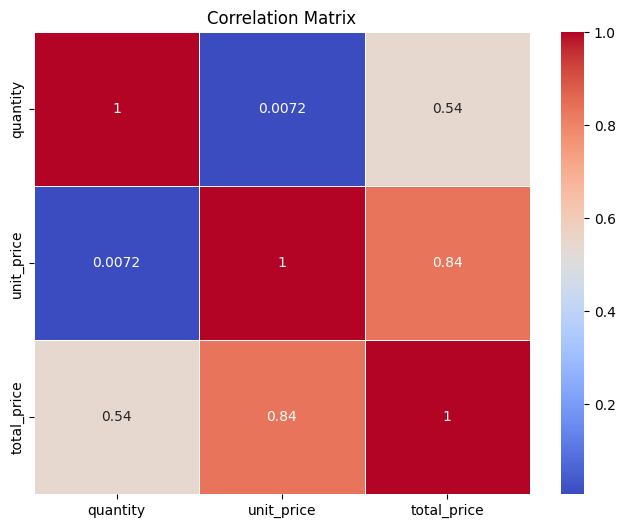

In [18]:
# Correlation matrix
corr_matrix = sales_data[['quantity', 'unit_price', 'total_price']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

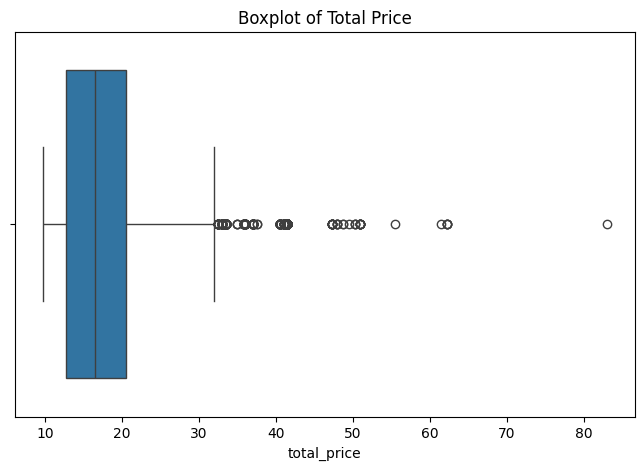

In [19]:
# Boxplot for total_price
plt.figure(figsize=(8,5))
sns.boxplot(data=sales_data, x='total_price')
plt.title('Boxplot of Total Price')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_47716\3398306399.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='total_price', data=sales_data, palette='viridis')


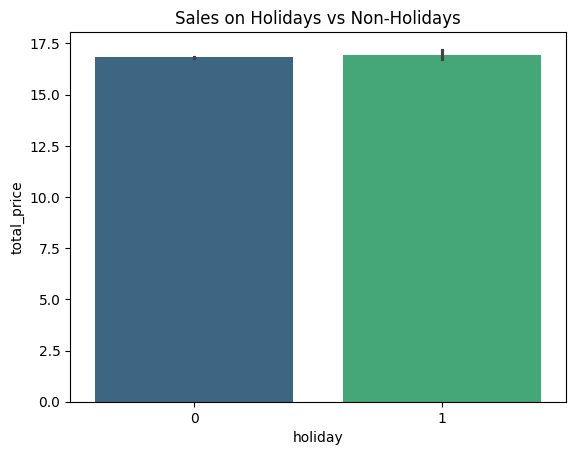

In [20]:
sns.barplot(x='holiday', y='total_price', data=sales_data, palette='viridis')
plt.title('Sales on Holidays vs Non-Holidays')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_47716\2625713092.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='promotion', y='total_price', data=sales_data, palette='magma')


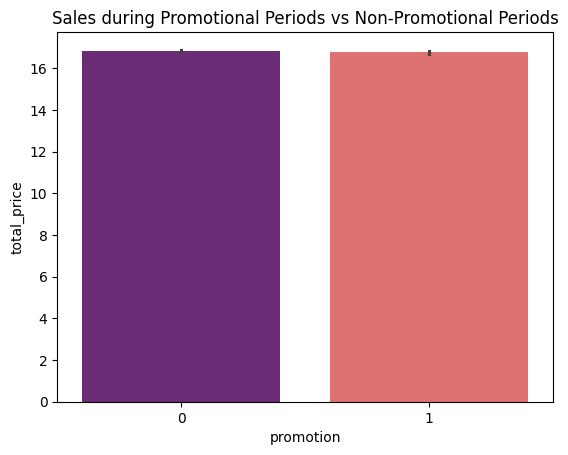

In [21]:
sns.barplot(x='promotion', y='total_price', data=sales_data, palette='magma')
plt.title('Sales during Promotional Periods vs Non-Promotional Periods')
plt.show()

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
daily_sales=sales_data.groupby('order_date')['quantity'].sum()
train_data=daily_sales[:-7]
test_data=daily_sales[-7:]
model=SARIMAX(train_data,order=(1,1,1),seasonal_order=(1,1,1,7))
sarima_model=model.fit(disp=False)

c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
# Aggregate daily sales data into weekly sales
sales_data['Week'] = sales_data['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sales = sales_data.groupby('Week')['quantity'].sum()

# View aggregated weekly sales
print(weekly_sales.head())

Week
2014-12-29     581
2015-01-05    1093
2015-01-12     929
2015-01-19     968
2015-01-26     944
Name: quantity, dtype: int64


In [26]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was

Best ARIMA Model MAPE: 0.1926, Best Parameters: (4, 1, 0)
Predictions:
Week
2015-10-19    851.434268
2015-10-26    904.804480
2015-11-02    946.180575
2015-11-09    967.079681
2015-11-16    935.464966
2015-11-23    907.994246
2015-11-30    935.124700
2015-12-07    943.962382
2015-12-14    941.228983
2015-12-21    926.836324
2015-12-28    929.934524
Name: predicted_mean, dtype: float64


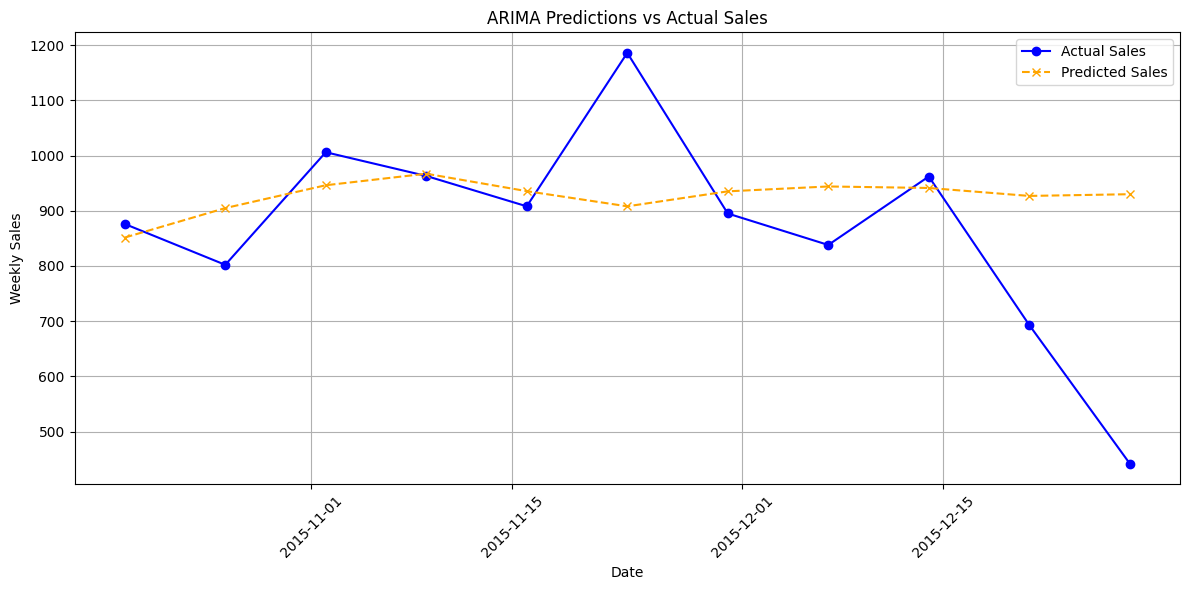

In [27]:
# # Pizza sales by week
# def prepare_weekly_sales(df):
#     df['order_date'] = pd.to_datetime(df['order_date'])
#     weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum()
#     return weekly_sales

# pizza_sales_weekly = prepare_weekly_sales(pizza_sales)

# train test split
train_size = int(0.8 * len(weekly_sales))
train, test = weekly_sales[:train_size], weekly_sales[train_size:]

# MAPE
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# ARIMA Model Tuneing
def tune_arima_model(train, test, p_values, d_values, q_values):
    best_score, best_params, best_predictions = float("inf"), None, None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(train, order=(p, d, q)).fit()
            predictions = model.forecast(steps=len(test))
            arima_mape = mape(test, predictions)
            if arima_mape < best_score:
                best_score, best_params, best_predictions = arima_mape, (p, d, q), predictions
        except:
            continue

    print(f"Best ARIMA Model MAPE: {best_score:.4f}, Best Parameters: {best_params}")
    return best_predictions, best_score, best_params

p_values, d_values, q_values = range(0, 6), range(0, 2), range(0, 6)
arima_predictions, arima_mape_score, best_params = tune_arima_model(train, test, p_values, d_values, q_values)

# Formating the predictions for display
arima_predictions = pd.Series(arima_predictions, index=test.index)

print("Predictions:")
print(arima_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(arima_predictions.index, arima_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('ARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\capstone\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


Best SARIMA Model MAPE: 0.1990
Predictions:
Week
2015-10-19     878.392111
2015-10-26    1007.857660
2015-11-02     956.033684
2015-11-09     895.216536
2015-11-16     920.057165
2015-11-23     958.605056
2015-11-30     971.159329
2015-12-07     903.347331
2015-12-14     999.430371
2015-12-21     958.317089
2015-12-28     892.694263
Name: predicted_mean, dtype: float64


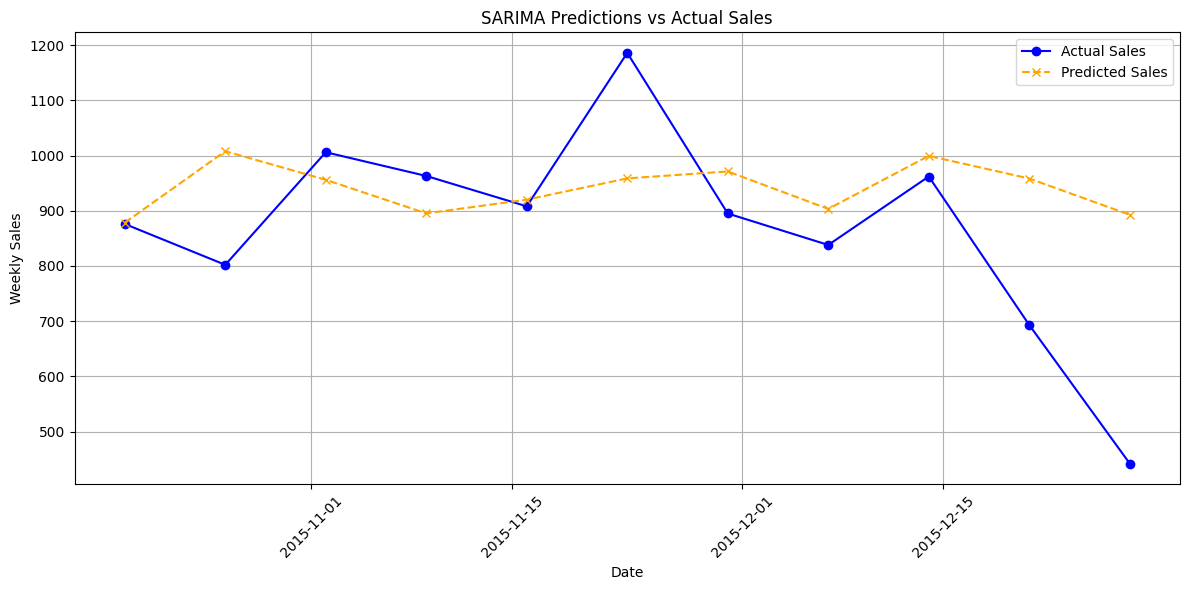

In [28]:
# train test split
train_size = int(0.8 * len(weekly_sales))
train, test = weekly_sales[:train_size], weekly_sales[train_size:]

# MAPE
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Best SARIMA Model Training and Output
def best_sarima_model(train, test):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
    predictions = model.forecast(steps=len(test))
    sarima_mape = mape(test, predictions)

    print(f"Best SARIMA Model MAPE: {sarima_mape:.4f}")
    return predictions, sarima_mape

# Train and evaluate the SARIMA model
sarima_predictions, sarima_mape_score = best_sarima_model(train, test)

# Formating the predictions for display
sarima_predictions = pd.Series(sarima_predictions, index=test.index)

print("Predictions:")
print(sarima_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(sarima_predictions.index, sarima_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('SARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()